##1) Loading Packages

### NLP
professor: Abran Yuen Durán
course: 2022-2023

Clasification Model

* 01) Loading Packages
* 02) Loading dataset
* 03) Descriptives (Target)
* 04) Train Test Split
* 05) Tokenizacion
  * 5.1) Stop-words
  * 5.2) Punctuation
  * 5.3) Token
* 06) BOW TF
* 07) TF-IDF
* 08) LSA (No obligatorio)
* 09) Data Normalization
* 10) Model Naive
* 11) SVM (Support Vector Machine)
* 12) Logistic Regression
* 13) Performance
* 14) Prediction

In [ ]:
import nltk # !pip install nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

lemmatizer = WordNetLemmatizer().lemmatize

## 2) Load dataset ("corpus")

In [ ]:
"""
In this chunk we define the relative path for our dataset.
"""

from google.colab import drive

mount='/content/gdrive'
print("Colab: mounting Google drive on ", mount)

drive.mount(mount)

# Switch to the directory on the Google Drive that you want to use
import os
drive_root = mount + "/My Drive/NUEVO/Chap_4_ML_SUPERVISADO"

# Create drive_root if it doesn't exist
create_drive_root = True
if create_drive_root:
  print("\nColab: making sure ", drive_root, " exists.")
  os.makedirs(drive_root, exist_ok=True)

# Change to the directory
print("\nColab: Changing directory to ", drive_root)
%cd $drive_root

Colab: mounting Google drive on  /content/gdrive
Mounted at /content/gdrive

Colab: making sure  /content/gdrive/My Drive/NUEVO/Chap_4_ML_SUPERVISADO  exists.

Colab: Changing directory to  /content/gdrive/My Drive/NUEVO/Chap_4_ML_SUPERVISADO
/content/gdrive/My Drive/NUEVO/Chap_4_ML_SUPERVISADO


In [ ]:
!ls # Pointing route

'Chapter 4 Classification.ipynb'   encuesta.xlsx


In [ ]:
# Read the input
#cargar el archivo desde carpeta de gdrive
df = pd.read_excel("encuesta.xlsx") # the dataset is loaded into a Pandas DataFrame
print(df.shape)


(9590, 2)


## 3) Descriptives (Target)

In [ ]:
df['ALERTDESCRIPTION'].value_counts()

Promoter     5850
Detractor    3740
Name: ALERTDESCRIPTION, dtype: int64

In [ ]:
narratives = list(df['ALERTDESCRIPTION'])
labels = np.array(df['DESCRIPTION'])
print("Number of narratives: {}".format(len(narratives)))

Number of narratives: 9590


In [ ]:
""" Showing document x """

def show_doc(case):
  print("Type of product:", labels[case])
  return narratives[case]

In [ ]:
show_doc(5)

Type of product: 95 So that there is no doubt, I would like to point out that the positive notes are for the agent who represents me for his dedication and dedication, never for company as a company.  The treatment received by the company, with no intention of offending, has been when I


'Detractor'

In [ ]:
show_doc(4999)

Type of product: 41 Speed. Thank you 


'Promoter'

In [ ]:
show_doc(5000)

Type of product: 82 In the only loss I've ever had I've had and I've got problems...Your company is not very recommendable based on my experience. 


'Detractor'

In [ ]:
categorias=df['ALERTDESCRIPTION'].value_counts()
categorias #nota personal. CALCULAR LOS PORCENTAJES DE CADA CATEGORIA

Promoter     5850
Detractor    3740
Name: ALERTDESCRIPTION, dtype: int64

In [ ]:
total_cells = np.product(df["ALERTDESCRIPTION"].shape)
print("total Documentos Importados",total_cells)

total Documentos Importados 9590


In [ ]:
pct= (categorias/total_cells)*100
pct=pd.DataFrame(pct)
pct

ALERTDESCRIPTION
Promoter          61.001043
Detractor         38.998957

In [ ]:

pct=pct.sort_values(by='ALERTDESCRIPTION', ascending=True).T
pct

# pct_.plot.barh()
# pct_.plot.bar()

pct.iloc[:,:].plot.barh( #barh indica horizontal
                            figsize=(10,2), #Tamaño en pulgadas
                            legend = True, #Incluir leyenda
                            title ="Proporcion Promotores Detractores" ,
                            fontsize =12, #Tamaño de letra de los ejes
                            stacked=True); #Con el ; del final nos ahorramos el encabecado técnico


In [ ]:
import re

In [ ]:
#Paquetes utilizados
#import re

df['clean_txt'] = np.vectorize(re.sub)("[-]?[\d]+[.]?[\d]+", "", df["DESCRIPTION"]) # Con esto encuentro números con decimales y negativos.
df['clean_txt'] = np.vectorize(re.sub)("[\[\]/{}⋅−]+", "", df["clean_txt"]) # # Delete characters [ ] { } ⋅ −


In [ ]:
df.head()

DESCRIPTION ALERTDESCRIPTION  \
0  68 The attention to the insured seemed excelle...         Promoter   
1                             41 Agility in repair.          Promoter   
2  81 The perfect repair. The very short time and...         Promoter   
3               23 very good attention and speed...          Promoter   
4  86 The professional sent by the repair company...        Detractor   

                                           clean_txt  
0   The attention to the insured seemed excellent...  
1                                Agility in repair.   
2   The perfect repair. The very short time and t...  
3                  very good attention and speed...   
4   The professional sent by the repair company t...

In [ ]:
"""
Total number of documents
"""
narratives = list(df['clean_txt'])
labels = np.array(df['ALERTDESCRIPTION'])
print("Number of narratives: {}".format(len(narratives)))

Number of narratives: 9590


## 4) Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

narratives_tr, narratives_te, y_tr, y_te = train_test_split(narratives, labels,
                                                            test_size=0.3, random_state=1)

print("Number of training examples: {}. Number of test examples: {}".format(len(narratives_tr), len(narratives_te)))

Number of training examples: 6713. Number of test examples: 2877


## 5) Tokenizacion
### 5.1 stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = stopwords.words('english')
stop_words = set(stop_words) # search in sets is much faster in python

for i in range(1,21):
    stop_words.add(i*'x')
print(sorted(stop_words)) # alphabetical sort

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

### 5.2 Punctuation

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from string import punctuation
punctuation_marks = set(punctuation)
print(punctuation_marks)

{'(', '^', "'", '-', '&', '{', '~', '?', '>', ':', ',', '.', '!', '$', '#', '+', '}', '%', ')', '<', '`', '/', '*', '"', ';', ']', '|', '\\', '=', '@', '[', '_'}


In [ ]:
stop_words_and_punctuation = stop_words.union(punctuation_marks)
print(stop_words_and_punctuation)

{'as', '(', 'will', 'are', 'before', 'during', "'", 'under', 'd', '&', 'am', 'all', 'him', 'than', 'few', 'was', 'shan', 'your', 'xxxxxxxxxx', '>', 'were', 'should', ',', 'ours', 'does', "weren't", 'my', 'mightn', 'ourselves', 'her', 'herself', 'been', 'nor', 'only', 'xxxxxxxxxxxxxxxxxx', '$', 'both', 'isn', 'yourself', 'or', '}', 'a', 'too', 'most', 'having', 'doesn', 'didn', 'his', "she's", 'against', 'which', "shan't", 're', "wouldn't", ';', 'with', 'won', '|', '\\', "don't", 'in', 'on', '=', 'i', 'whom', "didn't", '_', 'when', 'if', "shouldn't", "should've", 'and', 'that', "needn't", 'but', 'more', 'an', "you'll", "hasn't", 'because', 'for', "mightn't", 'me', 'at', 'off', 'again', 'no', '.', 'be', 'xxxxxxxxxxx', 'xxxxx', 'xxxxxxxx', 'xxxxxxxxxxxx', 'such', 'needn', '<', 'had', 'aren', 'its', "wasn't", 'above', 'y', 'have', 'until', 'xx', 'same', 'xxxxxxxxxxxxxxxxxxxx', 'xxxxxxxxxxxxxx', 'it', 'll', ']', 'where', "aren't", 'between', 'yourselves', 'you', 'this', 'down', 've', 'why',

### 5.3 Tokenizer

In [ ]:
def tokenizer(s, stop_words=[], lowercase=True,
              keep_sentences=False, min_word_len=1,
              lemmatize=False, stem=False):
    tokens = []
    if lowercase:
        s = s.lower() # downcase
    for sentence in sent_tokenize(s):
        ts = word_tokenize(sentence) # split string into words (tokens)
        ts = [t for t in ts if len(t) >= min_word_len] # remove very short words
        ts = [t for t in ts if t not in stop_words] # remove stop_words
        if lemmatize:
            ts = [lemmatizer(t) for t in ts] # put words into base form
        if stem:
            ts = [stemmer(t) for t in ts]
        if keep_sentences:
            tokens.append(ts)
        else:
            tokens.extend(ts)
    return tokens

In [ ]:
def preprocess_documents(texts):
    return [' '.join(tokenizer(text,
                               stop_words=stop_words_and_punctuation,
#                               lemmatize=True, stem=True,
                               min_word_len = 3))
            for text in texts]

In [ ]:
examples_tr = preprocess_documents(narratives_tr)
examples_te = preprocess_documents(narratives_te)

In [ ]:
print(len(examples_tr))
print(len(examples_te))

6713
2877


## 6) Bag-of-words (BOW) representation  / TF


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#TF_vectorizer = CountVectorizer(max_features=5000, #max_df=0.5, min_df=20,
#                                stop_words=stop_words_and_punctuation)
#TF_vectorizer

In [ ]:
TF_vectorizer = CountVectorizer(# MINIMUM NUMBER OF DOCUMENTS WHERE A WORD HAS TO APPEAR IN ORDER TO BE INCLUDED. PUTTING 1 IS LIKE NOT PUTTING ANYTHING
                               min_df=1,
                               # The maximum number allowed NOT to be discarded is 100%.
                               # 0.99 we remove the articles, words that appear 99% of the time.eces
                               max_df=1.,
                               stop_words='english',
                               # stop_words list of words that have no value. They are discarded by default in English, if we set none, it does not remove words.
                               # token_pattern that a token has to meet for the word to be considered separately.
                               # ngram_range statistics between pairs of words or triads ...
                               max_features=None)

In [ ]:
TF_vectorizer.fit(examples_tr)

CountVectorizer(stop_words='english')

In [ ]:
tf_tr = TF_vectorizer.transform(examples_tr)
TF_vocabulary = TF_vectorizer.get_feature_names_out()

In [ ]:
print(len(TF_vocabulary))
print(TF_vocabulary)

6604
['1km' '1st' '1º' ... 'zones' 'zuericher' 'être']


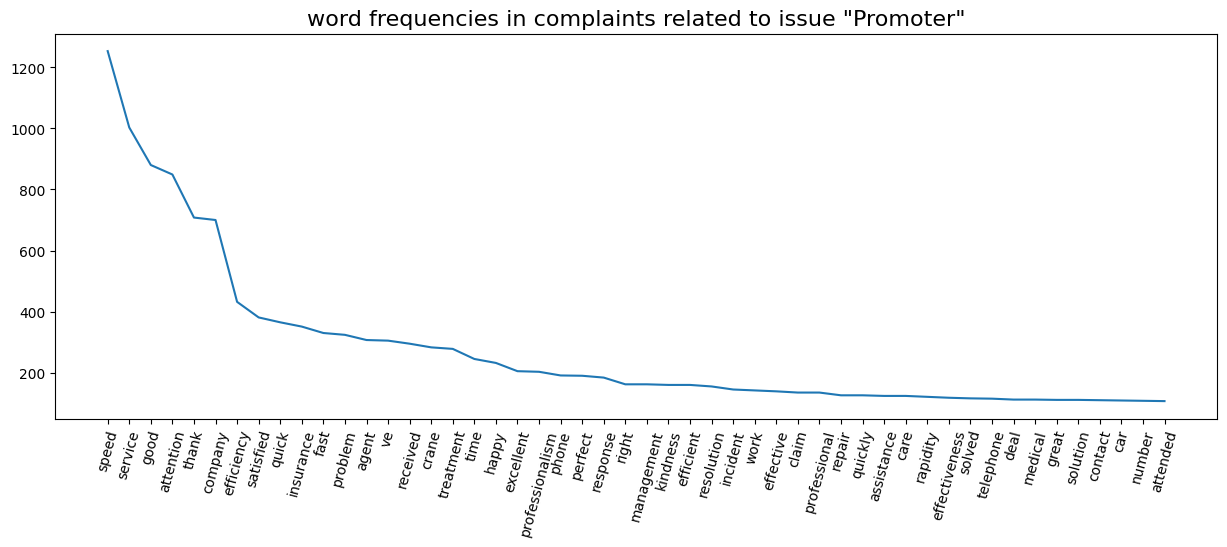

In [ ]:
n=50
unique_labels = np.unique(labels)
for label in unique_labels:
    freqs = np.array(tf_tr[y_tr==label].sum(axis=0))[0]
    plt.figure(figsize=(15,5))
    inds = np.argsort(freqs)[::-1]
    plt.plot(freqs[inds[:n]])
    plt.xticks(range(n), np.array(TF_vocabulary)[inds[:n]], rotation=75)
    plt.title('word frequencies in complaints related to issue ' + '"'+label+'"', fontsize=16)
    plt.show()

## 7) TF-IDF

In [ ]:
TFIDF_vectorizer = TfidfVectorizer(norm=None, smooth_idf=False)
TFIDF_vectorizer

TfidfVectorizer(norm=None, smooth_idf=False)

In [ ]:
print(TFIDF_vectorizer)

tfidf_tr = TFIDF_vectorizer.fit_transform(examples_tr)
TFIDF_vocabulary = TFIDF_vectorizer.get_feature_names_out()
TFIDF_vocabulary

TfidfVectorizer(norm=None, smooth_idf=False)


array(['1km', '1st', '1º', ..., 'zones', 'zuericher', 'être'],
      dtype=object)

In [ ]:
type(stop_words_and_punctuation)

set

In [ ]:
TFIDF_vectorizer = TfidfVectorizer(max_features=1000,
                                   stop_words=list(stop_words_and_punctuation),
                                   #stop_words=['under', 'until', 'up', 've', 'very', 'was'],
                                   norm='l2')
print(TFIDF_vectorizer)

tfidf_tr = TFIDF_vectorizer.fit_transform(examples_tr)
TFIDF_vocabulary = TFIDF_vectorizer.get_feature_names_out()
TFIDF_vocabulary

TfidfVectorizer(max_features=1000,
                stop_words=['as', '(', 'will', 'are', 'before', 'during', "'",
                            'under', 'd', '&', 'am', 'all', 'him', 'than',
                            'few', 'was', 'shan', 'your', 'xxxxxxxxxx', '>',
                            'were', 'should', ',', 'ours', 'does', "weren't",
                            'my', 'mightn', 'ourselves', 'her', ...])


array(['able', 'absolute', 'absolutely', 'abuse', 'accept', 'acceptable',
       'accident', 'accidents', 'according', 'account', 'acted', 'action',
       'add', 'addition', 'address', 'adequate', 'advance', 'advice',
       'advise', 'advisor', 'affected', 'afternoon', 'agency', 'agent',
       'agents', 'agile', 'agility', 'ago', 'agree', 'agreed', 'almost',
       'already', 'also', 'although', 'always', 'amb', 'amount', 'annual',
       'another', 'answer', 'answered', 'answering', 'answers', 'antonio',
       'anyone', 'anything', 'apart', 'apparently', 'application',
       'apply', 'appointment', 'appraisal', 'appreciate', 'appropriate',
       'approval', 'area', 'around', 'arranged', 'arrangement',
       'arrangements', 'arrival', 'arrive', 'arrived', 'ask', 'asked',
       'asking', 'assess', 'assessment', 'assigned', 'assistance',
       'attend', 'attendance', 'attended', 'attending', 'attends',
       'attention', 'attentive', 'august', 'authorization',
       'authoriza

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(tfidf_tr, y_tr)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dis

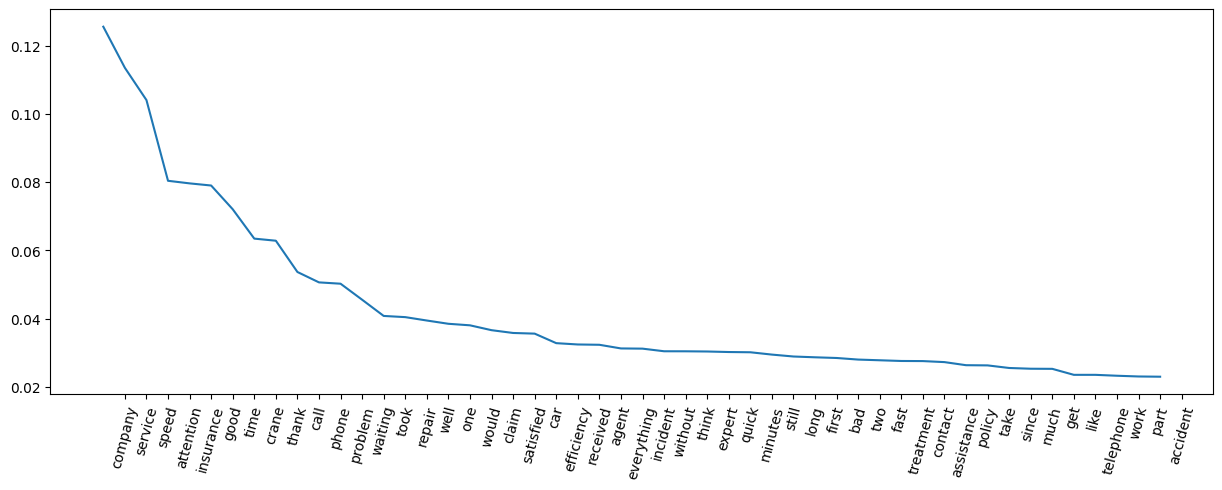

In [ ]:
n_more_informative = 500
inds_keep = np.argsort(-mi)
plt.figure(figsize=(15,5))
n_show = 50
plt.plot(mi[inds_keep[:n_show]])
plt.xticks(range(1,1+n_show), np.array(TFIDF_vocabulary)[inds_keep[:n_show]], rotation=75)
plt.show()

## 8) LSA  Latent Semantic Analysis

This is not a mandatory step. It would be usefull when there are millions of features


In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize

lsa = TruncatedSVD(n_components=100)
lsa.fit(tfidf_tr)
doc_vecs_tr  = lsa.transform(tfidf_tr)
word_vecs = lsa.singular_values_*lsa.components_.T

word_vecs_norm   = normalize(word_vecs)
doc_vecs_tr_norm = normalize(doc_vecs_tr)

In [ ]:
print(word_vecs_norm.shape)
print(doc_vecs_tr_norm.shape)

(1000, 100)
(6713, 100)


In [ ]:
latent_dimension_x = 0
latent_dimension_y = 1

# importing bokeh library for interactive dataviz

import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool, LabelSet, ColumnDataSource, Range1d
from bokeh.plotting import figure, show, output_notebook

output_notebook()
p = bp.figure(plot_width=800, plot_height=600, title="words in latent dimensions",
              tools="pan,wheel_zoom,box_zoom,reset,hover",
              x_axis_label='latent dimension {}'.format(latent_dimension_x),
              y_axis_label='latent dimension {}'.format(latent_dimension_y),
              #x_axis_type=None, y_axis_type=None,
              min_border=1)
p.title.text_font_size='16pt'
p.xaxis.axis_label_text_font_style='normal'
p.xaxis.axis_label_text_font_size='16pt'
p.yaxis.axis_label_text_font_style='normal'
p.yaxis.axis_label_text_font_size='16pt'

p.xgrid.visible = False
p.ygrid.visible = False

dictf = {'x':word_vecs_norm[:,latent_dimension_x],
         'y':word_vecs_norm[:,latent_dimension_y],
         'words':TFIDF_vocabulary}
aa = ColumnDataSource(dictf)
p.scatter(x='x', y='y', source=aa)
labels_p = LabelSet(x='x', y='y', text='words', level='glyph',
                    x_offset=5, y_offset=5, source=aa, render_mode='canvas')
p.add_layout(labels_p)

hover = p.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(p)

### Simmilar words

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

index2word = np.array(TFIDF_vocabulary)
word2index = {w:i for i,w in enumerate(index2word)}

def most_similar_words(word,n=10):
    n_latent_dimensions = np.shape(word_vecs_norm)[1]
    ind = word2index[word]
    aux = np.reshape(word_vecs_norm[ind,:], (1,n_latent_dimensions))
    dists = pairwise_distances(aux, word_vecs_norm).flatten()
    inds = dists.argsort().tolist()
    inds.remove(ind)
    return index2word[inds[:n]]

In [ ]:
print(word2index['contract'])
#print(index2word[406])

198


In [ ]:
most_similar_words('car')

array(['shop', 'garage', 'replacement', 'transfer', 'workshop', 'started',
       'turned', 'morning', 'blow', 'saturday'], dtype=object)

In [ ]:
most_similar_words('speed')

array(['simplicity', 'efficiency', 'execution', 'clarity', 'cordiality',
       'proceedings', 'delighted', 'dealt', 'safe', 'friendliness'],
      dtype=object)

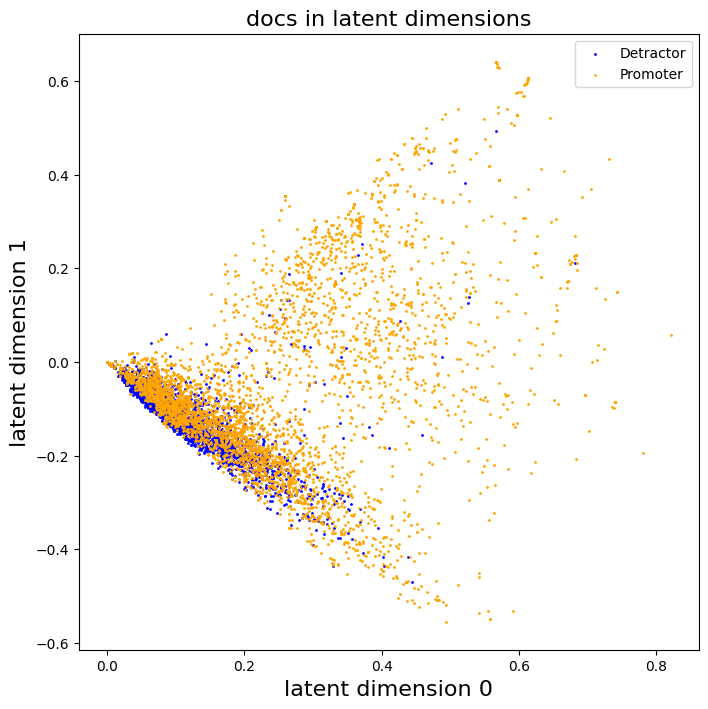

In [ ]:
colors = ['blue', 'orange', 'yellow', 'red', 'green', 'magenta']
unique_labels = np.unique(labels)


X = doc_vecs_tr_norm

latent_dimension_x = 0
latent_dimension_y = 1
plt.figure(figsize=(8,8))
for i,label in enumerate(unique_labels):
    plt.scatter(X[y_tr==label,latent_dimension_x],
                X[y_tr==label,latent_dimension_y],
                s = 1, alpha = 1, c = colors[i], label=label,
                )
#plt.axis([-50,50,-50,50])
plt.legend()
plt.xlabel('latent dimension {}'.format(latent_dimension_x), fontsize=16)
plt.ylabel('latent dimension {}'.format(latent_dimension_y), fontsize=16)
plt.title('docs in latent dimensions', fontsize=16)
plt.show()

## 09 Normalize data for Modeling

In [ ]:
from sklearn.preprocessing import normalize

X_proy_tr = normalize(lsa.transform(tfidf_tr))
tfidf_te  = TFIDF_vectorizer.transform(examples_te)
X_proy_te = normalize(lsa.transform(tfidf_te))

print(X_proy_tr.shape)
print(X_proy_te.shape)

(6713, 100)
(2877, 100)


## 10 Naive Model

Based on bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

#clf = GaussianNB()
#clf.fit(tfidf_tr, y_tr)
#print("score en training :", clf.score(tfidf_tr, y_tr))
#print("score en test     :", clf.score(tfidf_te, y_te))
#print()
clf = GaussianNB()
clf.fit(X_proy_tr, y_tr)
print("score en training :", clf.score(X_proy_tr, y_tr).round(3))
print("score en test     :", clf.score(X_proy_te, y_te).round(3))


score en training : 0.787
score en test     : 0.783


## 11 Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X_proy_tr, y_tr)
print("score en training :", clf.score(X_proy_tr, y_tr).round(3))
print("score en test     :", clf.score(X_proy_te, y_te).round(3))

score en training : 0.878
score en test     : 0.865


## 12 Logistic Regression

In [ ]:
#reducir el error se aplica el error cuadrático medio
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_proy_tr, y_tr)
print("score en training :", clf.score(X_proy_tr, y_tr).round(3))
print("score en test     :", clf.score(X_proy_te, y_te).round(3))

score en training : 0.876
score en test     : 0.861


## 13) Performance

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


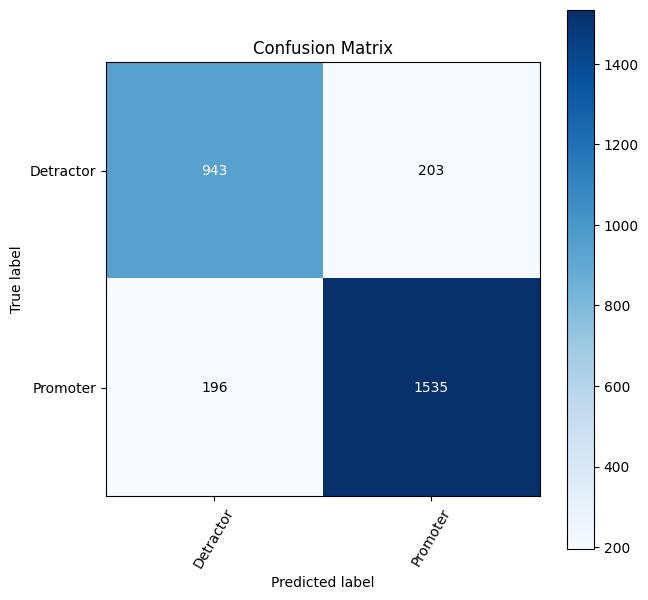

In [ ]:
# !pip install scikit-plot
from scikitplot.metrics import plot_confusion_matrix

plot_confusion_matrix(y_te, clf.predict(X_proy_te),
                      x_tick_rotation=60, figsize=(7,7))
plt.show()

## 14) Prediction

In [ ]:
X_proy_te

array([[ 0.02141151, -0.02715405, -0.04733764, ...,  0.04459603,
         0.02633505,  0.06717944],
       [ 0.24454644, -0.14027102, -0.04274254, ...,  0.16602428,
        -0.06860609, -0.0757144 ],
       [ 0.1109738 , -0.1419264 , -0.25757693, ..., -0.0216661 ,
        -0.01934372,  0.12134124],
       ...,
       [ 0.04024707, -0.05510447, -0.09577975, ..., -0.20685237,
         0.13270712, -0.09134514],
       [ 0.05361758, -0.04561995, -0.04405665, ...,  0.05626586,
        -0.04720233, -0.0203122 ],
       [ 0.48031844, -0.50875581,  0.65065966, ..., -0.00808861,
         0.00528436, -0.00455945]])

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc

col_clase_positiva = 1
y_pred_proba = clf.predict_proba(normalize(X_proy_te))
y_pred = clf.predict(X_proy_te)
print('')
print(classification_report(y_te, y_pred))


              precision    recall  f1-score   support

   Detractor       0.83      0.82      0.83      1146
    Promoter       0.88      0.89      0.88      1731

    accuracy                           0.86      2877
   macro avg       0.86      0.85      0.86      2877
weighted avg       0.86      0.86      0.86      2877



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

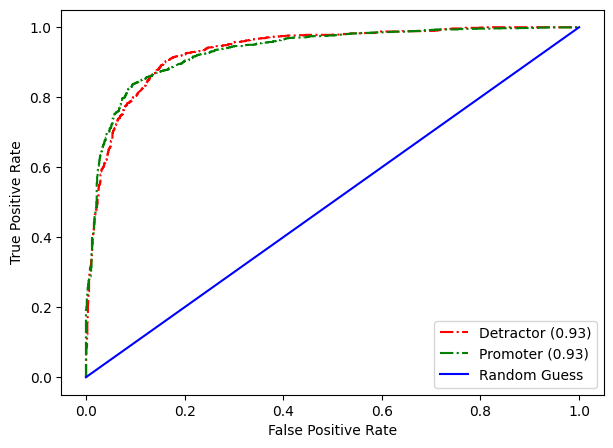

In [ ]:
#buen método porque no toca la curva con el 1
colors2 = ['r', 'g', 'm', 'c', 'y']
plt.figure(figsize=(7,5))
for i,l in enumerate(unique_labels):
    fpr, tpr, thresholds = roc_curve(y_te, y_pred_proba[:,i], pos_label=unique_labels[i])
    plt.plot(fpr, tpr, colors2[i]+'-.', label=l+' (%2.2f)' % auc(fpr, tpr))
plt.plot(fpr, fpr, 'b-', label = 'Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend();